● 라이브러리 불러오기 및 모디 모듈 로드

In [1]:
import cv2
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import modi
from IPython.display import clear_output, display
import time

bundle = modi.MODI(ai_mode=True)
mot = bundle.motors[0]
btn = bundle.buttons[0]

Running PyMODI (v1.0.1)
Initiating can connection...
Start initializing connected MODI modules
Button (4087) has been connected!
Motor (2924) has been connected!
Motor (2924) is not up to date. Please update the module by calling modi.update_module_firmware
MODI modules are initialized!
MODI AI modules are initialized!


● 메인 함수

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


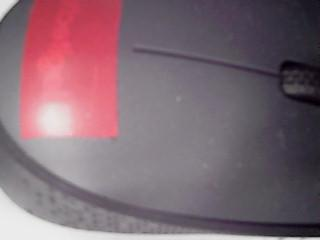

ready
cam True


In [2]:
# 클레스 종류 
classes = ['label1','label2']

# 학습한 모델 불러오기 및 구성
model = tensorflow.keras.models.load_model('./model/model.h5')

data = np.ndarray(shape=(1, 24, 32, 3), dtype=np.float32)

width = 32
height = 24
dim = (width, height)

#카메라 모듈 불러오기
cam = bundle.ai_cameras[0]
cam.set_window()

print('ready')
print('cam',cam.is_opened())

#카매라가 연결되었으면 활성화
while cam.is_opened():
    frame = cam.read()
    
    #  frame 자료 이미지 변환
    image = Image.fromarray(frame)

    # 
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    # Numpy array 데이터 형태로 변환
    image_array = np.asarray(image)

    # display the resized image
    #image.show()

    # 이미지 정규화 작업
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    
    # 영상을 라즈베리파이가 처리가능하게 32 x 24 크기로 축소하여 리사이징
    resized = cv2.resize(normalized_image_array, dim, interpolation = cv2.INTER_AREA)
    # Load the image into the array
    data[0] = resized

#     print('resized', data[0].shape ,end='\r')

    # 모델에 영상을 넣어 예측하는 부분. 
    pred = model.predict_classes(data)

    pred_class = classes[pred[0]]

    print("Predicted Class : ", pred_class , end='\r')
    cam.show(frame)
    

    if pred_class == 'label1':
        mot.speed = -40, 40
    elif pred_class == 'label2':
        mot.speed = 0, 0

    if btn.clicked:
        mot.speed = 0,0
        # self.camera.release()
        cv2.destroyAllWindows()
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        mot.speed = 0,0
        cam.release()
        cv2.destroyAllWindows()
        break
        
    